In [428]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import File
Data = pd.read_csv(r"C:\Users\yeodi\OneDrive\Desktop\EE0005_Ding Cheng\Lab Quiz\quizData_SetD.csv")
X = pd.DataFrame(Data)

# Check variables for Numeric/Categorical
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Height    4000 non-null   float64
 1   Weight    4000 non-null   float64
 2   Rings     4000 non-null   int64  
 3   Diameter  4000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 125.1 KB


In [429]:
# Problem 1: Exploratory Analysis, Standard description
X.describe()

,Height,Weight,Rings,Diameter
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.138874,0.236674,9.918250,0.406095
std,0.042092,0.139511,3.256949,0.099668
min,0.000000,0.001500,1.000000,0.055000
25%,0.110000,0.125375,8.000000,0.345000
50%,0.140000,0.229500,9.000000,0.420000
75%,0.165000,0.325000,11.000000,0.480000
max,1.130000,1.005000,29.000000,0.650000


'\nHeight has the most normal looking distribution. Datapoint are closely clustered in the center and forms\na bell shaped histogram.\n\nDiameter has the most number of outliers\n'

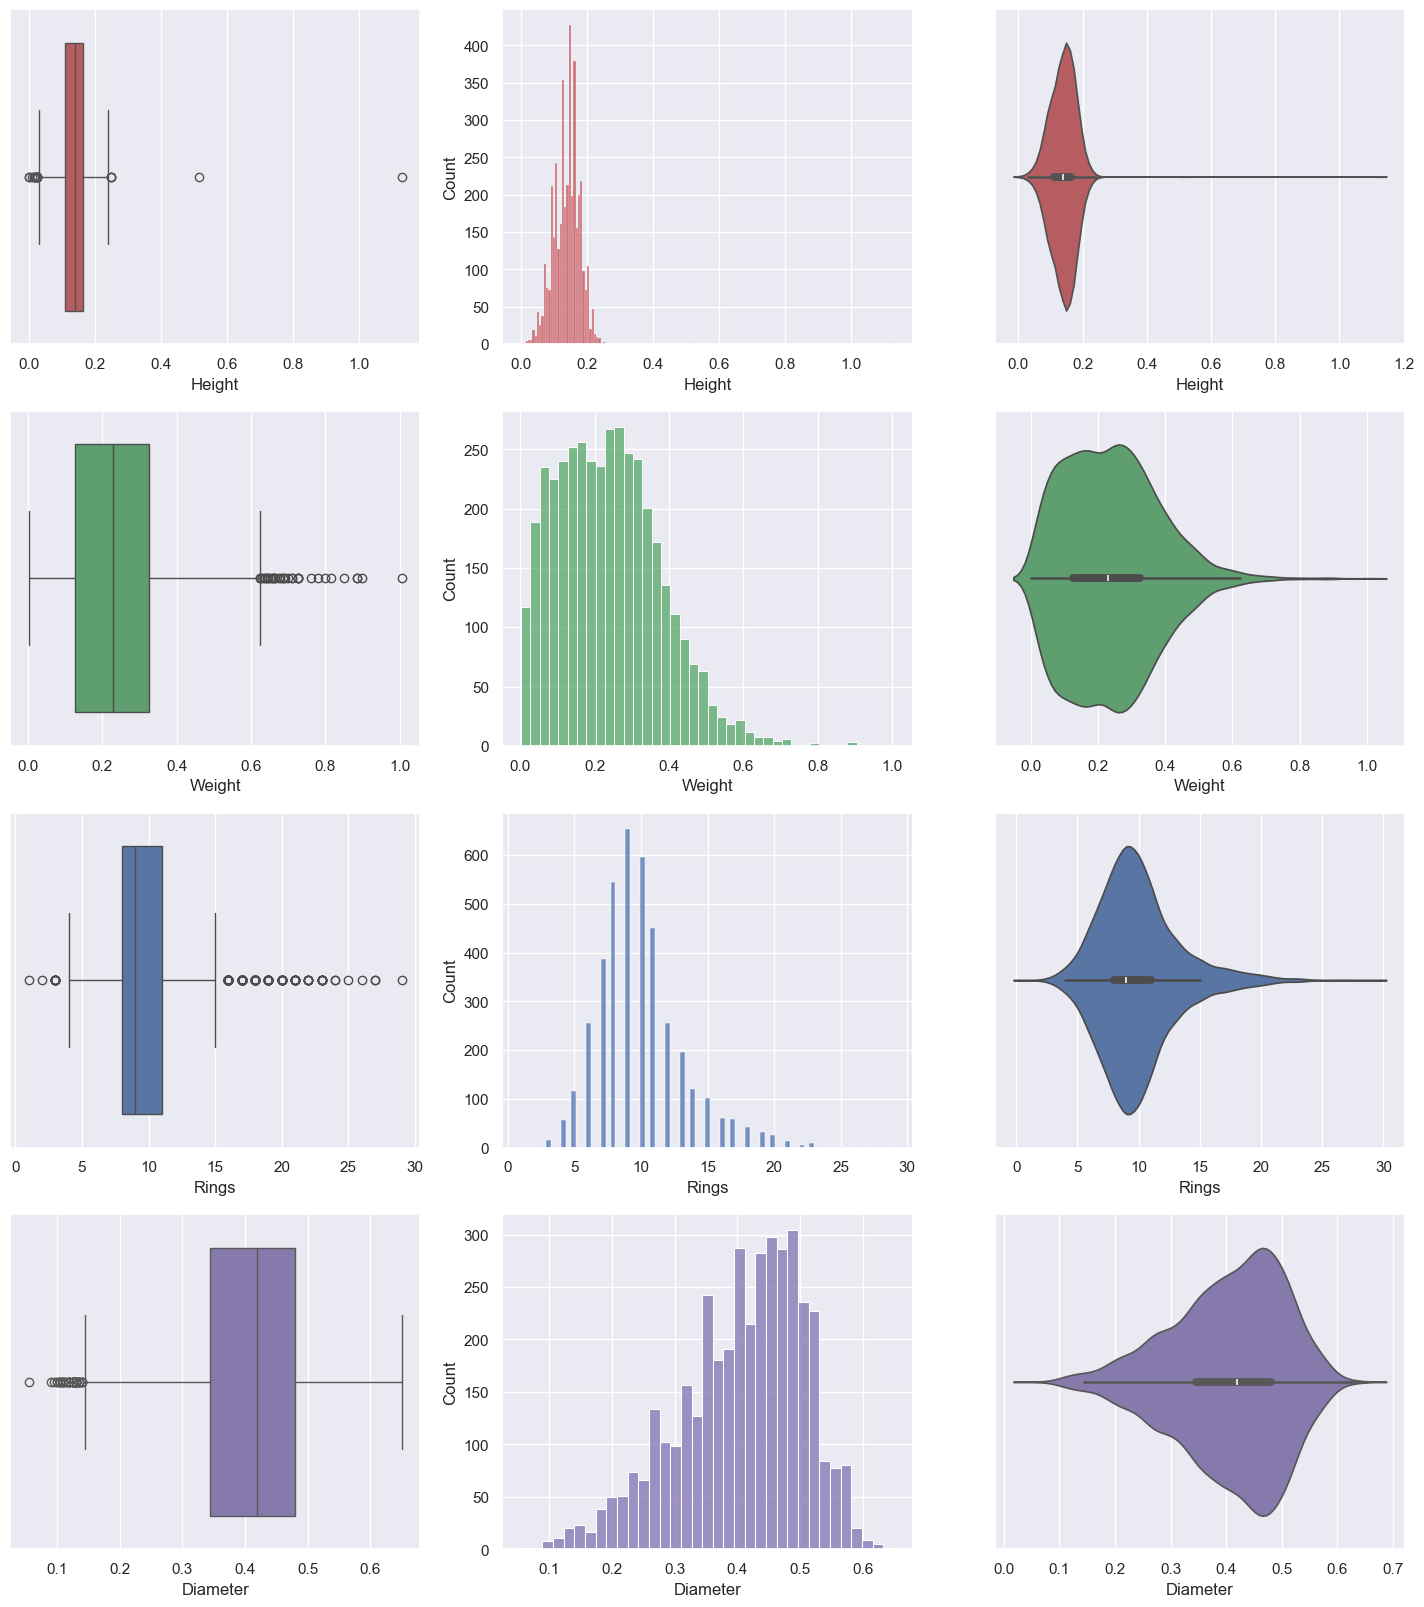

In [430]:
# Exploratory Analysis (Plots)

# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 20))
colors = ["r", "g", "b", "m", "c"]

count = 0
for var in X:
    sb.boxplot(data=X[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=X[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data=X[var], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1

"""
Height has the most normal looking distribution. Datapoint are closely clustered in the center and forms
a bell shaped histogram.

Diameter has the most number of outliers
"""

            Height    Weight     Rings  Diameter
Height    1.000000  0.815176  0.562059  0.831975
Weight    0.815176  1.000000  0.634896  0.905535
Rings     0.562059  0.634896  1.000000  0.582222
Diameter  0.831975  0.905535  0.582222  1.000000


'\nWeight has the highest absolute correlation with Diameter\n\nYes, since weight has a strong linear relationship, it will be a useful variable for predicting diameter, \nhowever this correlation has no causalities\n'

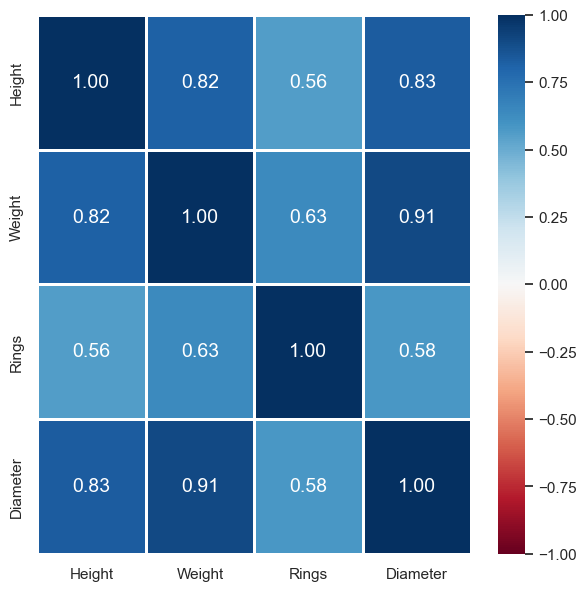

In [431]:
# Correlation Matrix & Heatmap
print(X.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(7, 7))
sb.heatmap(X.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

"""
Weight has the highest absolute correlation with Diameter

Yes, since weight has a strong linear relationship, it will be a useful variable for predicting diameter, 
however this correlation has no causalities
"""

'\nHeight has the strongest linear relationship with diameter since the datapoints are closest to a linear\nline and its histogram is the closest to a bell-shaped graph, hence it will be useful in prediction\n'

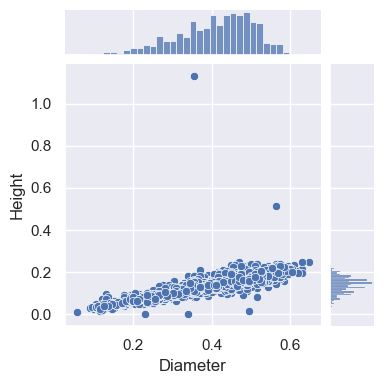

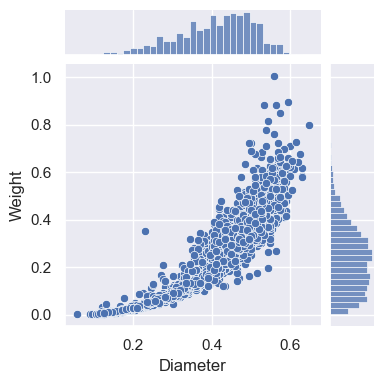

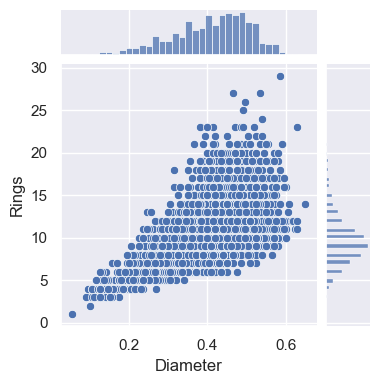

In [432]:
# Mutual Jointplot
sb.jointplot(data = X, x = "Diameter", y = "Height", height = 4)
sb.jointplot(data = X, x = "Diameter", y = "Weight", height = 4)
sb.jointplot(data = X, x = "Diameter", y = "Rings", height = 4)

"""
Height has the strongest linear relationship with diameter since the datapoints are closest to a linear
line and its histogram is the closest to a bell-shaped graph, hence it will be useful in prediction
"""

'\nHeight has the strongest linear relationship with diameter since the datapoints are closest to a linear\nline, hence it will be useful in prediction\n'

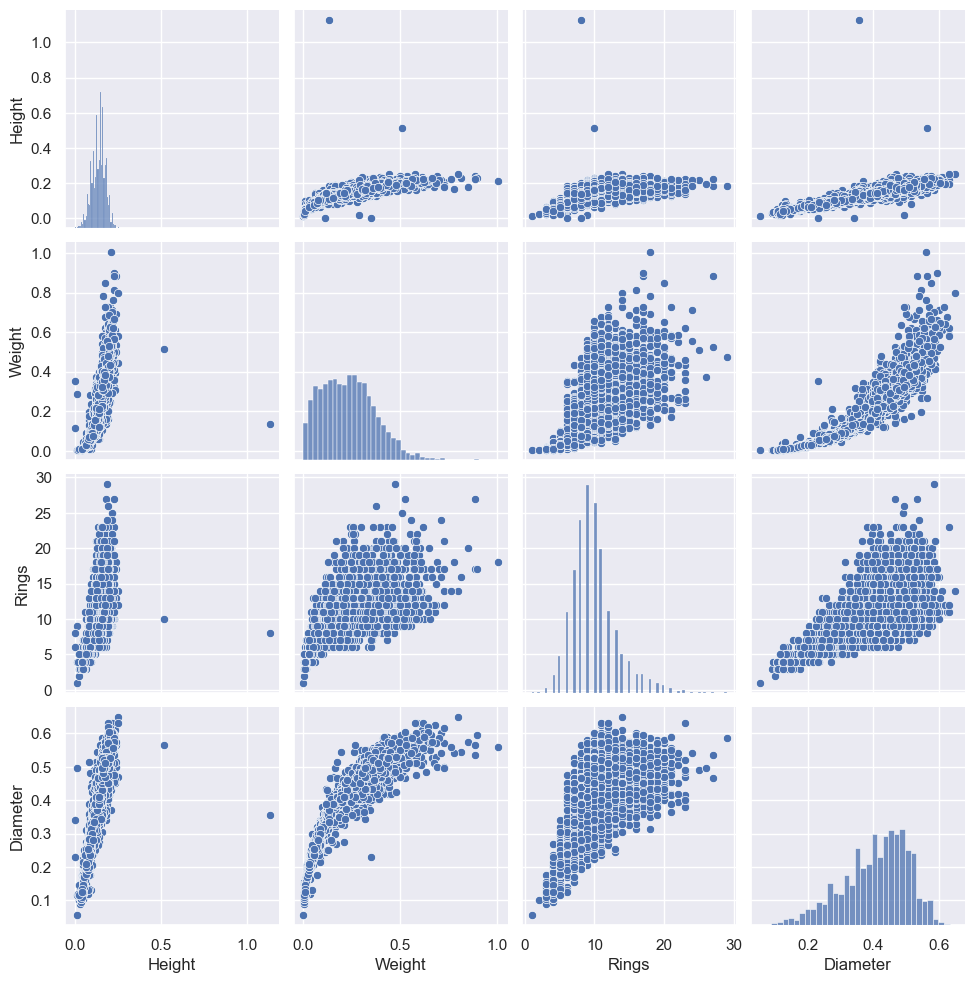

In [433]:
# Pairplot
sb.pairplot(data = X)
"""
Height has the strongest linear relationship with diameter since the datapoints are closest to a linear
line, hence it will be useful in prediction
"""

In [434]:
# Start of Problem 2: Uni-Variate Linear Regression

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a Linear Regression object
linreg = LinearRegression()
XDia = pd.DataFrame(Data['Diameter'])
XHeight = pd.DataFrame(Data['Height'])

# Split the dataset into Train and Test       
XDia_train = pd.DataFrame(XDia[:3200])
XDia_test  = pd.DataFrame(XDia[-800:])
XHeight_train = pd.DataFrame(XHeight[:3200])
XHeight_test  = pd.DataFrame(XHeight[-800:])

# Check the sample sizes
print("Train Set :", XDia_train.shape, XHeight_train.shape)
print("Test Set  :", XDia_test.shape, XHeight_test.shape)

Train Set : (3200, 1) (3200, 1)
Test Set  : (800, 1) (800, 1)


In [435]:
linreg.fit(XHeight_train, XDia_train)

LinearRegression()

In [436]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [0.13625156]
Coefficients 	: a =  [[1.91724484]]


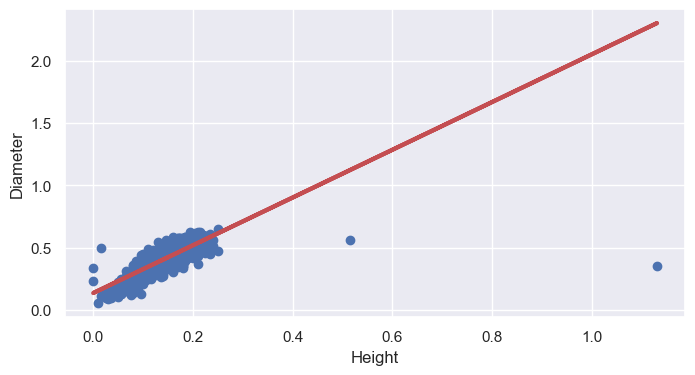

In [437]:
# Formula for the Regression Line
regline_x = XHeight_train
regline_y = linreg.intercept_ + linreg.coef_ * XHeight_train

# Plotting the Linear Regression Line
f = plt.figure(figsize=(8,4))
plt.scatter(XHeight_train, XDia_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(),'r-', linewidth = 3)
plt.xlabel("Height") # Add a label for x-axis
plt.ylabel("Diameter") # Add a label for y-axis
# plt.legend(["blue", "green"], loc="upper left")
plt.show()

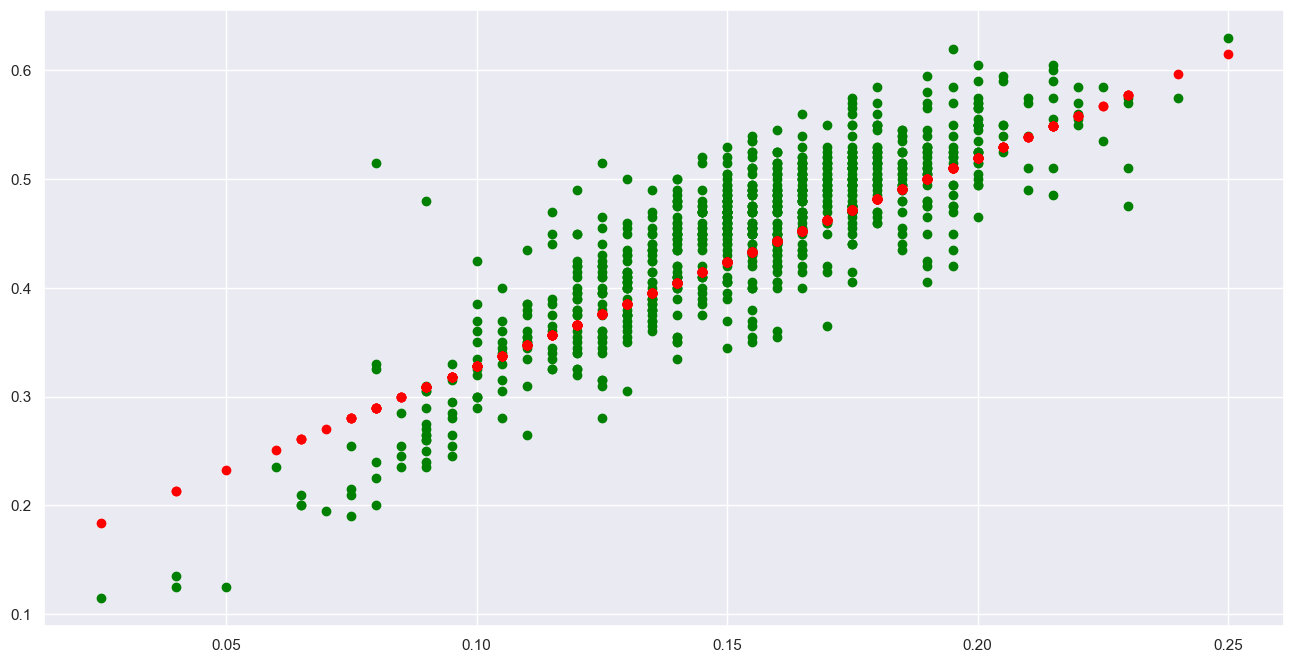

Explained Variance (R^2) 	: 0.6628996933248948
Mean Squared Error (MSE) 	: 0.002144704627632954


In [438]:
# Predict Diameteer values corresponding to Height
XDia_test_pred = linreg.predict(XHeight_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(XHeight_test, XDia_test, color = "green")
plt.scatter(XHeight_test, XDia_test_pred, color = "red")
plt.show()
print("Explained Variance (R^2) \t:", linreg.score(XHeight_test, XDia_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(XDia_test, XDia_test_pred)
print("Mean Squared Error (MSE) \t:", mse)

In [439]:
# Create a Linear Regression object
linreg = LinearRegression()
XDia = pd.DataFrame(Data['Diameter'])
XWeight = pd.DataFrame(Data['Weight'])

# Split the dataset into Train and Test       
XDia_train = pd.DataFrame(XDia[:3200])
XDia_test  = pd.DataFrame(XDia[-800:])
XWeight_train = pd.DataFrame(XWeight[:3200])
XWeight_test  = pd.DataFrame(XWeight[-800:])

# Check the sample sizes
print("Train Set :", XDia_train.shape, XWeight_train.shape)
print("Test Set  :", XDia_test.shape, XWeight_test.shape)

Train Set : (3200, 1) (3200, 1)
Test Set  : (800, 1) (800, 1)


Intercept 	: b =  [0.24868728]
Coefficients 	: a =  [[0.65971242]]


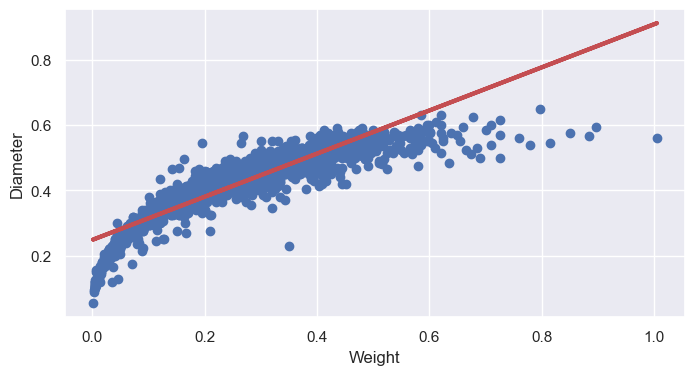

In [440]:
linreg.fit(XWeight_train, XDia_train)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression Line
regline_x = XWeight_train
regline_y = linreg.intercept_ + linreg.coef_ * XWeight_train

# Plotting the Linear Regression Line
f = plt.figure(figsize=(8,4))
plt.scatter(XWeight_train, XDia_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(),'r-', linewidth = 3)
plt.xlabel("Weight") # Add a label for x-axis
plt.ylabel("Diameter") # Add a label for y-axis
# plt.legend(["blue", "green"], loc="upper left")
plt.show()

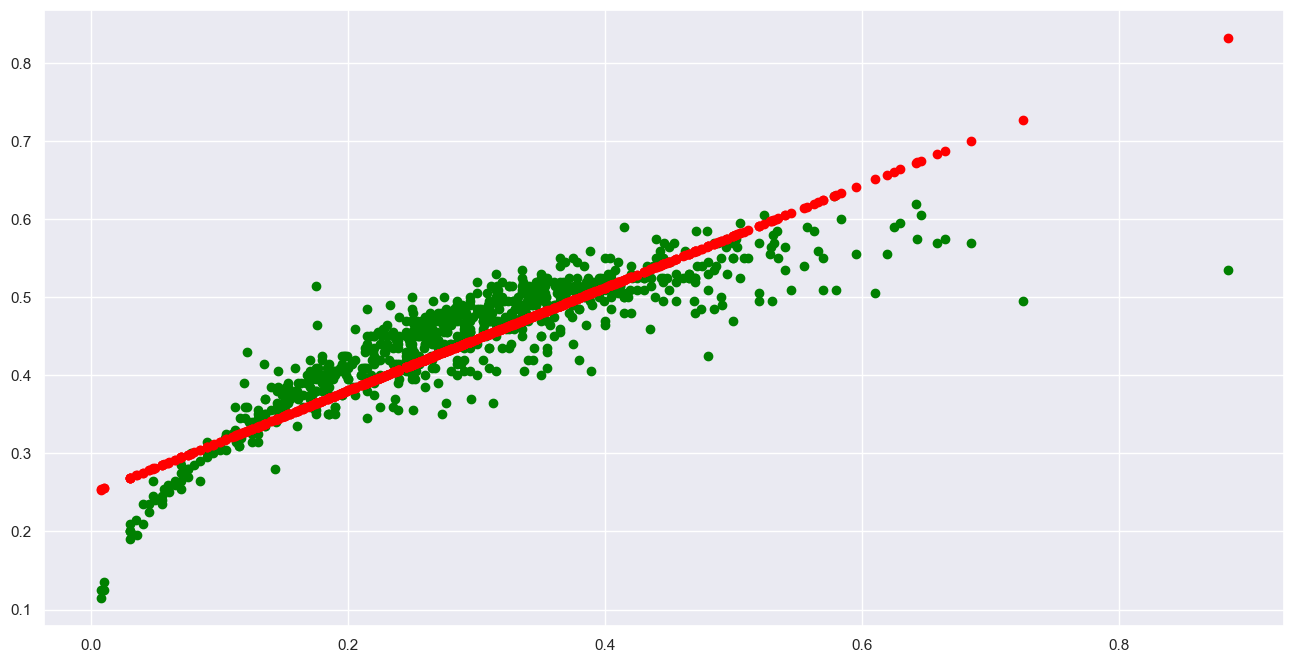

Explained Variance (R^2) 	: 0.7334734660965392
Mean Squared Error (MSE) 	: 0.0016956991118986073


In [441]:
# Predict Diameteer values corresponding to Weight
XDia_test_pred = linreg.predict(XWeight_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(XWeight_test, XDia_test, color = "green")
plt.scatter(XWeight_test, XDia_test_pred, color = "red")
plt.show()
print("Explained Variance (R^2) \t:", linreg.score(XWeight_test, XDia_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(XDia_test, XDia_test_pred)
print("Mean Squared Error (MSE) \t:", mse)

In [442]:
# Create a Linear Regression object
linreg = LinearRegression()
XDia = pd.DataFrame(Data['Diameter'])
XRings = pd.DataFrame(Data['Rings'])

# Split the dataset into Train and Test       
XDia_train = pd.DataFrame(XDia[:3200])
XDia_test  = pd.DataFrame(XDia[-800:])
XRings_train = pd.DataFrame(XRings[:3200])
XRings_test  = pd.DataFrame(XRings[-800:])

# Check the sample sizes
print("Train Set :", XDia_train.shape, XRings_train.shape)
print("Test Set  :", XDia_test.shape, XRings_test.shape)

Train Set : (3200, 1) (3200, 1)
Test Set  : (800, 1) (800, 1)


Intercept 	: b =  [0.21276936]
Coefficients 	: a =  [[0.01876098]]


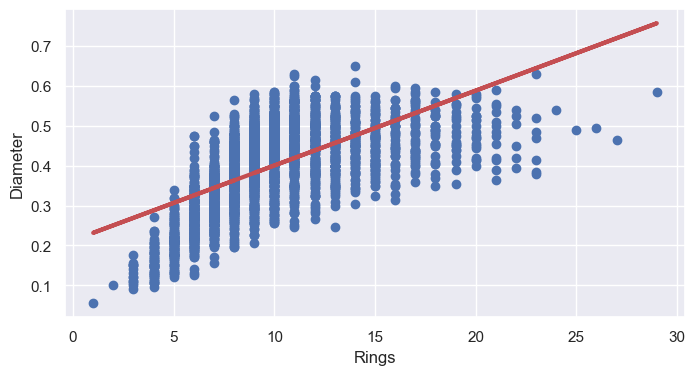

In [443]:
linreg.fit(XRings_train, XDia_train)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Formula for the Regression Line
regline_x = XRings_train
regline_y = linreg.intercept_ + linreg.coef_ * XRings_train

# Plotting the Linear Regression Line
f = plt.figure(figsize=(8,4))
plt.scatter(XRings_train, XDia_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(),'r-', linewidth = 3)
plt.xlabel("Rings") # Add a label for x-axis
plt.ylabel("Diameter") # Add a label for y-axis
# plt.legend(["blue", "green"], loc="upper left")
plt.show()

In [ ]:
# Predict Diameteer values corresponding to Rings
XDia_test_pred = linreg.predict(XRings_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(XRings_test, XDia_test, color = "green")
plt.scatter(XRings_test, XDia_test_pred, color = "red")
plt.show()
print("Explained Variance (R^2) \t:", linreg.score(XRings_test, XDia_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(XDia_test, XDia_test_pred)
print("Mean Squared Error (MSE) \t:", mse)

In [ ]:
"""
Weight is the best in terms of predicting Diameter, it has the lowest Mean Squared Error, indicating better 
model performance, suggesting that the predictions are closer to the actual values.

Weight also has the highest Explained Variance, indicating better performance and that the model explains
a large proportion of the variance in the target variable
"""

In [ ]:
# Multi-Variate Linear Regression

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
predictors = ["Height", "Weight", "Rings"]

y = pd.DataFrame(Data["Diameter"])
X = pd.DataFrame(Data[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'black', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'black', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [ ]:
"""Reducing the size of the test dataset to improve the prediction length even further"""

# Multi-Variate Linear Regression

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
predictors = ["Height", "Weight", "Rings"]

y = pd.DataFrame(Data["Diameter"])
X = pd.DataFrame(Data[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'black', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'black', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

"""
Comparing the MSE and R^2 values with the one above, MSE is lower and R^2 values is higher when the test
size is reduced, this shows that by reducing the test data size, it helps to improve the prediction of length
"""

In [ ]:
"""
Removing Variables that do not have a linear relationship with what we're trying to predict, in the
following case being rings. The Correlation is close to 0 and the additional datapoints that may not be
as useful in predicting diameter would only contribute as noise.
"""

# Multi-Variate Linear Regression

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
predictors = ["Height", "Weight"]

y = pd.DataFrame(Data["Diameter"])
X = pd.DataFrame(Data[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'black', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'black', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

"""
Comparing the MSE and R^2 values with the one above, MSE is lower and R^2 values is higher when 
rings is removed since it does not contribute much to the prediction of diameter and would only act as 
noise.
"""